## Ridge Regression for reduce MSE

Alpha: 0.01, MSE: 0.5306, R²: 0.5958
Alpha: 0.1, MSE: 0.5306, R²: 0.5958
Alpha: 1, MSE: 0.5305, R²: 0.5958
Alpha: 10, MSE: 0.5303, R²: 0.5960
Alpha: 100, MSE: 0.5292, R²: 0.5968


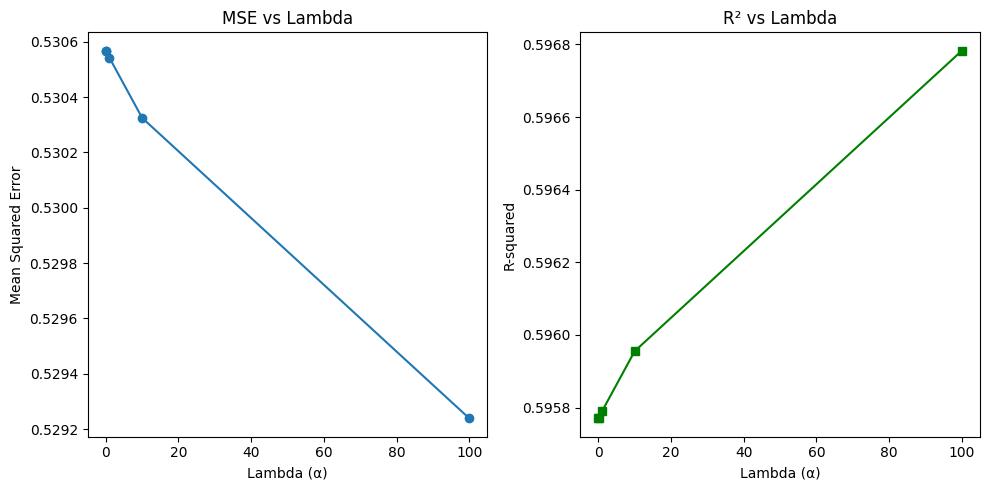

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load California Housing dataset
housing = fetch_california_housing()
# https://www.kaggle.com/code/khaledsherif22/fetch-california-housing
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Try different lambda (alpha) values
alphas = [0.01, 0.1, 1, 10, 100]
mse_list = []
r2_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_list.append(mse)
    r2_list.append(r2)
    print(f"Alpha: {alpha}, MSE: {mse:.4f}, R²: {r2:.4f}")

# Plot MSE and R² vs Alpha
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, mse_list, marker='o')
plt.xlabel('Lambda (α)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Lambda')

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_list, marker='s', color='green')
plt.xlabel('Lambda (α)')
plt.ylabel('R-squared')
plt.title('R² vs Lambda')

plt.tight_layout()
plt.show()

## Program with Linaer Regresion

Linear Regression MSE: 0.5306
Linear Regression R²: 0.5958


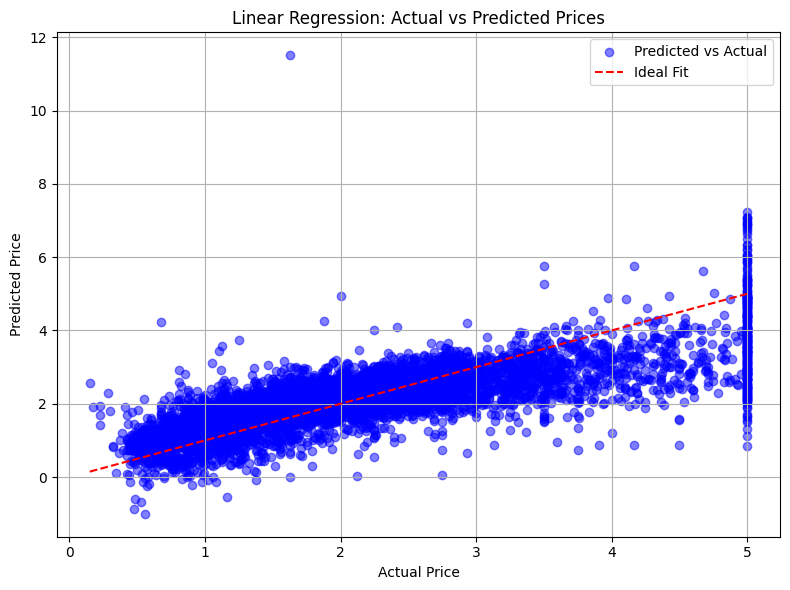

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear Regression (no alpha tuning needed)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R²: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Ridge spreads the penalty across all coefficients, keeping all features but reducing their impact.
- Lasso can zero out some coefficients entirely, effectively removing those features from the model.


Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear models, but they differ in how they penalize model coefficients

Ridge : Shrinks coefficients but rarely to zero

Lasso : Can shrink some coefficients exactly to zero